In [31]:
import numpy as np
import copy
from sklearn import preprocessing
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve
import sklearn.ensemble as se
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

import seaborn as sns
%matplotlib inline
from xgboost import plot_importance
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
import warnings
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification

In [32]:
file2 = 'afterfilter.xlsx'
data = pd.read_excel(file2)

In [33]:
df = data

In [34]:
df.head()

,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,Systolic,Diastolic,Weight,Height,Body-Mass-Index,White-Blood-Cells,...,Uric.Acid,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Blood-Rel-Diabetes,Diabetes
0,1,77,8,5.00,98,56,75.4,174.0,24.90,7.6,...,362.8,1.298,5.56,1.39,4.7,3,3,1,2,0
1,1,49,11,5.00,122,83,92.5,178.3,29.10,5.9,...,404.5,3.850,7.21,1.08,5.5,1,1,1,2,0
2,1,37,11,4.93,174,99,99.2,180.0,30.62,10.2,...,339.0,1.581,4.03,0.98,5.2,2,1,1,1,0
3,1,81,5,2.67,136,61,75.5,166.2,27.33,9.1,...,368.8,0.756,4.50,1.04,5.8,1,1,1,2,0
4,2,38,8,4.52,109,69,81.6,174.9,26.68,7.6,...,226.0,0.756,5.15,1.49,4.6,1,1,1,2,0


In [5]:
df.shape

(29015, 41)

In [6]:
y =  df['Diabetes']
x = df.drop('Diabetes',axis = 1)

In [7]:
###### 递归消除特征#######lasso
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
es = LogisticRegression()
rfe = RFE(estimator=es)

rfe.fit(x, y)

print('Selected features:')
print(rfe.support_.tolist())

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Selected features:
[False, True, False, True, False, False, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, True, False, False, False, True, True, True, True, True, True, True, True]


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
###### 递归消除特征#######
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
es2 = LinearSVC()
rfe2 = RFE(estimator=es2)

rfe2.fit(x, y)

print('Selected features:')
print(rfe2.support_.tolist())

D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\svm\_bas

Selected features:
[True, False, False, True, False, False, False, False, True, False, True, True, True, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, True, True, True, True, True, True, True, True]


D:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 #svc  1,4,9, 11 12 13 14 15 16 22 23  29 33 34 35 36 37 38
'Gender', 'Age', 'Annual-Family-Income', 'Ratio-Family-Income-Poverty',
       'Systolic', 'Diastolic', 'Weight', 'Height', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.', 'Mean-cell-Hemoglobin',
       'Platelet-count', 'Mean-Platelet-Vol', 'Segmented-Neutrophils',
       'Hematocrit', 'Red-Cell-Distribution-Width', 'Albumin', 'Cholesterol',
       'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus',
       'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'Total-Cholesterol', 'HDL', 'Glycohemoglobin', 'Vigorous-work',
       'Moderate-work', 'Health-Insurance', 'Blood-Rel-Diabetes',

In [ ]:
'Age', 'Annual-Family-Income',
       'Systolic', 'Diastolic', 'Weight', 'Height', 
       'White-Blood-Cells', 
       'Platelet-count', 'Mean-Platelet-Vol', 'Segmented-Neutrophils',
       'Hematocrit', 'Red-Cell-Distribution-Width', 
       'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 
       'Bilirubin', 'Protein', 'Uric.Acid', 
       'Health-Insurance', 'Blood-Rel-Diabetes'

In [71]:
df = data

In [75]:
#svc
y =  df['Diabetes']
x = df.drop(['Age', 'Annual-Family-Income',
       'Systolic', 'Diastolic', 'Weight', 'Height', 
       'White-Blood-Cells', 
       'Platelet-count', 'Mean-Platelet-Vol', 'Segmented-Neutrophils',
       'Hematocrit', 'Red-Cell-Distribution-Width', 
       'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 
       'Bilirubin', 'Protein', 'Uric.Acid', 
       'Health-Insurance', 'Blood-Rel-Diabetes','Diabetes'],axis = 1)

In [84]:
adasyn = ADASYN(sampling_strategy='all')

x_balance, y_balance = adasyn.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(x_balance,y_balance,test_size=0.2)

In [85]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
xg_proba=xg_model.predict_proba(X_test)
####评价指标
print(classification_report(y_test, xg_pred,digits=4))


              precision    recall  f1-score   support

           0     0.9731    0.9882    0.9806      5486
           1     0.9885    0.9739    0.9811      5745

    accuracy                         0.9809     11231
   macro avg     0.9808    0.9810    0.9809     11231
weighted avg     0.9810    0.9809    0.9809     11231



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(xg_pred,y_test)

array([[5566,    0],
       [   0, 5561]], dtype=int64)

In [14]:
spc = 5092/(5080+76)
spc

0.9875872769588828

In [32]:
# t-SNE visualization
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [33]:
X_train_be, X_test_be, y_train_be, y_test_be = train_test_split(x,y,test_size=0.2, random_state=42)
X_embedded_before = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(X_train_be)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21589 samples in 0.000s...
[t-SNE] Computed neighbors for 21589 samples in 1.544s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21589
[t-SNE] Computed conditional probabilities for sample 2000 / 21589
[t-SNE] Computed conditional probabilities for sample 3000 / 21589
[t-SNE] Computed conditional probabilities for sample 4000 / 21589
[t-SNE] Computed conditional probabilities for sample 5000 / 21589
[t-SNE] Computed conditional probabilities for sample 6000 / 21589
[t-SNE] Computed conditional probabilities for sample 7000 / 21589
[t-SNE] Computed conditional probabilities for sample 8000 / 21589
[t-SNE] Computed conditional probabilities for sample 9000 / 21589
[t-SNE] Computed conditional probabilities for sample 10000 / 21589
[t-SNE] Computed conditional probabilities for sample 11000 / 21589
[t-SNE] Computed conditional probabilities for sample 12000 / 21589
[t-SNE] Computed conditional probabilities for sam

In [41]:
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(x_balance)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 51794 samples in 0.012s...
[t-SNE] Computed neighbors for 51794 samples in 13.773s...
[t-SNE] Computed conditional probabilities for sample 1000 / 51794
[t-SNE] Computed conditional probabilities for sample 2000 / 51794
[t-SNE] Computed conditional probabilities for sample 3000 / 51794
[t-SNE] Computed conditional probabilities for sample 4000 / 51794
[t-SNE] Computed conditional probabilities for sample 5000 / 51794
[t-SNE] Computed conditional probabilities for sample 6000 / 51794
[t-SNE] Computed conditional probabilities for sample 7000 / 51794
[t-SNE] Computed conditional probabilities for sample 8000 / 51794
[t-SNE] Computed conditional probabilities for sample 9000 / 51794
[t-SNE] Computed conditional probabilities for sample 10000 / 51794
[t-SNE] Computed conditional probabilities for sample 11000 / 51794
[t-SNE] Computed conditional probabilities for sample 12000 / 51794
[t-SNE] Computed conditional probabilities for sa

C:\Users\zuoha\AppData\Local\Temp\ipykernel_22708\91395314.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(0,0,0,c=cin,edgecolors='k',label='diabets')


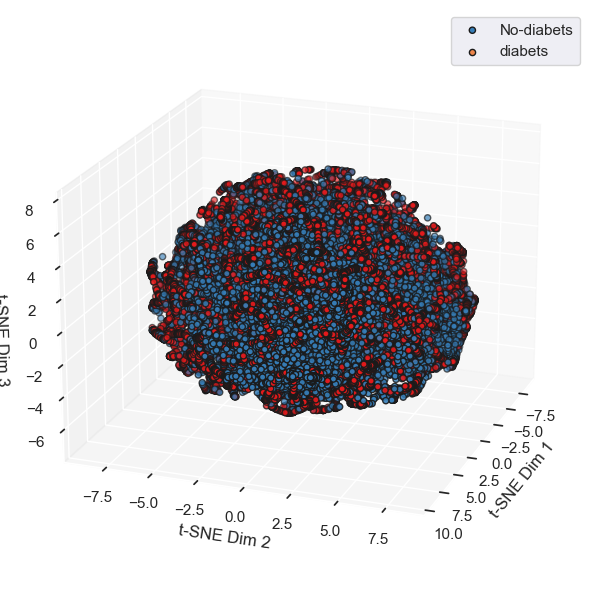

In [45]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(font_scale=1)
cin = sns.color_palette("muted")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[i] for i in y_balance],\
           edgecolors='k',label='No-diabets')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='diabets')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1")
ax.set_ylabel("t-SNE Dim 2")
ax.set_zlabel("t-SNE Dim 3")
#plt.title("SMOTE",size="xx-large")
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles=(handles[0],handles[1]), labels=(labels[0],labels[1]),loc='upper left')
ax.legend(loc=0)
fig.set_size_inches(7.5,7.5)